# Artificial Neural Network Implemented From Scratch

## Rebecca Stewart



Objective; 
* Build a multi-layer feed-forward/backpropagation neural network classifier without the help of deep learning libraries. 
* One must be able to adjust the following parameters:
    1. Learning Rate
    2. Number of epochs
    3. Depth of architecture—number of hidden layers between the input and output layers
    4. Number of nodes in a hidden layer—width of the hidden layers  
* Test the classifier using all the features in the Red/White Wine dataset (RedWhiteWine.csv) allowing the classifier to decide how to build the internal weighting system. Attributes can be reviewed in the WineQuality.pdf.  
* Determine what the best neural network structure and hyperparameter settings results in the best predictive capability.


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

In [2]:
# Read in the data
file = "https://library.startlearninglabs.uw.edu/DATASCI420/2019/Datasets/RedWhiteWine.csv"
#We know we have some blank rows, so, skip_blank_lines=True will help clean up the dataset
data = pd.read_csv(file, sep=",", header=0, skip_blank_lines=True )
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Class
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,1
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,1
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,1
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,1


In [3]:
# What kind of data types are included?
data.dtypes

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
Class                     int64
dtype: object

In [4]:
data.shape

(6497, 13)

In [5]:
data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Class
count,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000
mean,7.215307,0.339666,0.318633,5.443235,0.056034,30.525319,115.744574,0.994697,3.218501,0.531268,10.491801,5.818378,0.246114
std,1.296434,0.164636,0.145318,4.757804,0.035034,17.749400,56.521855,0.002999,0.160787,0.148806,1.192712,0.873255,0.430779
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000,0.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000,0.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000,0.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000,0.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000,1.000000


In [6]:
# Check for Class Imbalance Problem. According to Seth, unless one class is less than 5% of the other, we are ok
data['Class'].value_counts().sort_index()

0    4898
1    1599
Name: Class, dtype: int64

In [7]:
# Make sure that these really are numeric and any values that are not will be coded consistently as NaN
data = data.apply(pd.to_numeric, errors='coerce')

# Confirm that there are no missing values
print(data.isnull().sum(axis = 0))

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
Class                   0
dtype: int64


In [8]:
# Scale the columns - this will only affect those that are not alredy 0/1 values
scaler = MinMaxScaler()
data[data.columns] = scaler.fit_transform(data[data.columns])
data.head()


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Class
0,0.297521,0.413333,0.000000,0.019939,0.111296,0.034722,0.064516,0.206092,0.612403,0.191011,0.202899,0.333333,1.0
1,0.330579,0.533333,0.000000,0.030675,0.147841,0.083333,0.140553,0.186813,0.372093,0.258427,0.260870,0.333333,1.0
2,0.330579,0.453333,0.024096,0.026074,0.137874,0.048611,0.110599,0.190669,0.418605,0.241573,0.260870,0.333333,1.0
3,0.611570,0.133333,0.337349,0.019939,0.109635,0.055556,0.124424,0.209948,0.341085,0.202247,0.260870,0.500000,1.0
4,0.297521,0.413333,0.000000,0.019939,0.111296,0.034722,0.064516,0.206092,0.612403,0.191011,0.202899,0.333333,1.0


### Prepare  Y and X for ANN functions

In [9]:
Y = data["Class"]
X = data.iloc[:,0:-1] 
X = X.T # This is necessary so that we feed the gradient decent function X as # Dimension by # Datapoints
Y = np.array(Y) # This is necessary so that we pass Y as a vector instead of a series
Y = Y.reshape((1, len(Y)))

### Logistic (Sigmoid) Function

In [10]:
# This function does something similar to sklearn.linear_model.LogisticRegressionCV()
# Creating a numerically stable logistic s-shaped definition to call
def sigmoid(x, Derivative=False):
    x = np.clip(x, -500, 500)  # limit the values of the signal between -500 and 500
    if x.any()>=0:
        return 1/(1 + np.exp(-x))
    else:
        return np.exp(x)/(1 + np.exp(x))

### TanH Activation Function

In [11]:

# An alternate activation function
def tanh(x):
    x = np.clip(x, -500, 500)  # limit the values of the signal between -500 and 500
    return np.tanh(x) 

### Loss Function

Because we are dealing with a binary classification problem, we will use  cross-entropy for our loss function, this is also sometimes referred to as logarithmic loss. 

Cross Entropy loss for a single datapoint = $\sum_{i=1}^{c} y_i*log (\hat y_i) $
For binary classification: $y_i*log (\hat y_i) + (1-y_i)*log(1-\hat y_i) $

In [12]:

def loss(m, Y, A ):
    # Cross entropy loss function
    cost = (-1/m)*np.sum(Y*np.log(A) + (1-Y)*np.log(1-A)) # cost of error
    return cost

### Initialize Parameters
This function will initialize a vector or matrix of random numbers. It will be used when we initially create our weights and biases.  

In [13]:
# define the dimentions and set the weights to random numbers

def init_parameters(dim1, dim2,std=1e-1, random = True):
    if(random):
        return(np.random.random([dim1,dim2])*std)
    else:
        return(np.zeros([dim1,dim2]))

### Forward Propagation
The purpose of the forward propagation function is to modify the data as it moves from layer to layer using weights and biases. 

The calc_out_vec function does two things; First, it calculates the dot product of our data (either from the input layer or from a previous hidden layer) with the weight matrix and adds our biases. Then it uses a sigmoid function (our activation function) to squish the results to a values between zero and one.

The fwd_prop function also keeps track of the outputs from the calc_out_vec function and stores them in an  array so it can be passed back to the calling function, so that they can be used in back-propagation.

In [14]:
# Single layer network: Forward Prop
# Passed in the weight vectors, bias vector, the input vector and the Y
def calc_out_vec(W,b,X):
    Z =  np.dot(W, X) + b     # dot product of the weights and X + bias
    A = sigmoid(Z)  #    print(Z.shape)
    # Uses sigmoid to create a predicted vector
    return(A)

def fwd_prop(weights,biases,X,Y, input_layers):
    A=[]
    outputs_vectors=[]
    for index in range(input_layers):
        if index==0:
            A.append(calc_out_vec(weights[index],biases[index], X)) 
        else:
            A.append(calc_out_vec(weights[index], biases[index], A[index-1]) )
            
        outputs_vectors.append(A[index])
    return(outputs_vectors)
    

### Backpropagation
This function is used to calculate the gradient so that we can adjust the weights and biases. We start with the last layer and go backwards through the layers, each step calculating the derivatives of the weights and biases, which are then returned to the calling function. 

In [15]:

def back_prop(A,weights,X,Y, input_layers):
    m = np.shape(X)[1] # used the calculate the cost by the number of inputs -1/m
    # Initialize these lists with zeros so that we can fill them up with values from each layer
    dW=[0] * (input_layers)
    db=[0] * (input_layers)
    dZ=[0] * (input_layers)
    for index in reversed(range(input_layers)):
        # If this is the last layer/output layer, then compare to the target values, and use this to calculate derivitives
        if index == input_layers-1:
            dZ[index] = A[index] - Y
            dW[index] = np.dot(dZ[index], A[index-1].T)/m
            db[index] = np.sum(dZ[index], axis=1, keepdims=True)/m
               
        # If this is not the output layer, but a hidden layer, then we calculate the derivitives using information from the  last layer
        else:
            dZ[index] = np.multiply(np.dot(weights[index+1].T, dZ[index+1]), 1-np.power(A[index], 2))
            if index==0:
                dW[index] = np.dot(dZ[index], X.T)/m # here we use the original dataset dimensions
            else:
                dW[index] = np.dot(dZ[index], A[index-1].T)/m
            db[index] = np.sum(dZ[index], axis=1, keepdims=True)/m
           
           
    return(dW, db)

### Initialize the size of the hidden layers
This function uses the size of the dataset (number of features), along with number of hidden layers, number of nodes in the output layer and number of nodes in the hidden layers to initialize an array, which just keeps track of the size of each layer. 

In [16]:
def initialize_array_of_node_sizes(num_feature,num_hidden_layers, hl_nodes, num_out_nodes ):
    # Create an array that keeps track of number of nodes in each layer
    
    # Initial list variable
    array_num_Nodes = list()

    # First layer is our input layer, the number of nodes is going to be the number of features of our dataset
    array_num_Nodes.append(num_feature)

    # For each hidden layer, add number of nodes for that hidden layer (which is specified by hl_nodes)
    for layer in range(num_hidden_layers):
        array_num_Nodes.append(hl_nodes)
    
    # Finally, add the number of nodes for our output layer. If output is binary, then this will be just a single node
    array_num_Nodes.append(num_out_nodes)
    return array_num_Nodes

### Gradient Descent
This function performs a simple gradient descent. After completing a round of forward propagation and backward propagation, the weights are updated based on the learning rate and gradient. The loss for that iteration is recorded in the loss_array. The function returns the final weight and bias parameters and the loss array after running for given number of iterations.


In [17]:
def run_grad_desc(num_epochs,learning_rate,X,Y,num_out_nodes, num_hidden_layers, hl_nodes, num_feature, num_samples ):
    # Create an array that keeps track of number of nodes in each layer
    array_num_Nodes=initialize_array_of_node_sizes(num_feature, num_hidden_layers, hl_nodes, num_out_nodes )
    m = np.shape(X)[1] # used the calculate the cost by the number of inputs -1/m
    loss_array = np.ones([num_epochs])*np.nan # resets the loss_array to NaNs
    weights = []
    biases=[]
    x=0
    
    # This loop create lists for the weights and biases
    while x+2 <=len(array_num_Nodes):
        level_1, level_2 = array_num_Nodes[x:x+2] #This will let us select 1st and 2nd values, 2nd and 3rd, 3rd and 4th, etch
        curr_weights= init_parameters(level_2, level_1,  True)
        weights.append(curr_weights) 
        biases.append(init_parameters(level_2, 1,  True)) 
        x += 1
        
    # for each epoch, run forward prop, backward prop and update the weights & biases
    for i in np.arange(num_epochs):
        A = fwd_prop(weights,biases,X,Y, num_hidden_layers+1)
        derivitave_Weight,derivitave_Bias  = back_prop(A, weights,X,Y, num_hidden_layers +1)    # get gradient and the cost from BP 
        index = num_hidden_layers 
        while index >=0:   
            weights[index] = weights[index] - learning_rate*derivitave_Weight[index]    # update weight
            biases[index] = biases[index] - learning_rate*derivitave_Bias[index]    # update bias
            index = index-1
        cost =loss(m, Y, A[num_hidden_layers])
        
        loss_array[i] = cost    # loss array tracks cost values
        parameter = {"W":weights,"B":biases}           # assign 
        
    return(parameter,loss_array)

### Running the code - calling the gradient descent function
Now that all of the helper functions are created we can run gradient descent on the wine dataset.

In [21]:
# Number of features and rows of dataset is set here
num_feature, num_samples = np.shape(X)
num_out_nodes= 1        # Number of ouput nodes

In [28]:
#Initialize Variables
np.random.seed(0)
num_epochs = 1000        #Number of epochs: 100 500 1000 10000   
learning_rate = 0.005    #Learning Rate: .2 .1 .05 .01
num_hidden_layers=2     # Number of hidden layers
hl_nodes=6              # Number of nodes in our hidden layers

params, loss_array = run_grad_desc(num_epochs,learning_rate,X,Y,num_out_nodes, num_hidden_layers , hl_nodes, num_feature, num_samples )
#print(loss_array[num_epochs-1])

### Plot of the loss array
We can use the following to get a sense of how quickly the loss goes down for number of epochs.  I ran the above with different values for the num_epochs and learning rates and found that 1000 seems to be about right for this dataset if the learning rate isn't less than .005.

In [29]:
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (8.0, 6.0) #Set default plot sizes
plt.rcParams['image.interpolation'] = 'nearest' #Use nearest neighbor for rendering

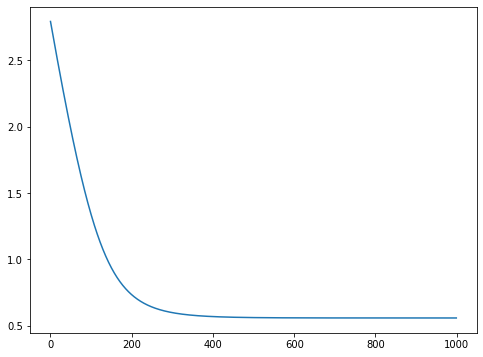

In [30]:
plt.plot(loss_array)

### The following code will allow us to adjust these four hyperparameters
<ul>
<li>Learning Rate
<li>Number of epochs
<li>Depth of architecture—number of hidden layers between the input and output layers
<li>Number of nodes in a hidden layer—width of the hidden layers (optional) Momentum
</ul>
We can compare the final loss values for different sets of parameters.

In [31]:
np.random.seed(0)
num_epochs = 1000            #Number of epochs: 100 500 1000 10000         
learning_rate = 0.02         #Learning Rate: .2 .1 .05 .01     
num_hidden_layers=2          #Depth of architecture 1 2 4 6
hl_nodes=6                  #Number of nodes in a hidden layer: 4, 6, 8, 10

params, loss_array = run_grad_desc(num_epochs,learning_rate,X,Y,num_out_nodes, num_hidden_layers , hl_nodes, num_feature, num_samples )
print(str(min(loss_array))  + " for a neural network with a learning rate of " + str(learning_rate) +", with " + str(num_hidden_layers) + " hidden layers, and " + str(hl_nodes) + " nodes in the hidden layers." )


0.5580519461855119 for a neural network with a learning rate of 0.02, with 2 hidden layers, and 6 nodes in the hidden layers.


In [32]:
np.random.seed(0)
num_epochs = 1000           #Number of epochs: 100 500 1000 5000         
learning_rate = 0.05        #Learning Rate: .2 .1 .05 .01     
num_hidden_layers=4         #Depth of architecture 1 2 4 6
hl_nodes=8                  #Number of nodes in a hidden layer: 4, 6, 8, 10

params, loss_array = run_grad_desc(num_epochs,learning_rate,X,Y,num_out_nodes, num_hidden_layers , hl_nodes, num_feature, num_samples )
print(str(min(loss_array))  + " for a neural network with a learning rate of " + str(learning_rate) +", with " + str(num_hidden_layers) + " hidden layers, and " + str(hl_nodes) + " nodes in the hidden layers." )

0.5580255313127026 for a neural network with a learning rate of 0.05, with 4 hidden layers, and 8 nodes in the hidden layers.


In [35]:
np.random.seed(0)
num_epochs = 500             #Number of epochs: 100 500 1000 10000         
learning_rate = 0.01         #Learning Rate: .2 .1 .05 .01     
num_hidden_layers=1          #Depth of architecture 1 2 4 6
hl_nodes=10                 #Number of nodes in a hidden layer: 4, 6, 8, 10

params, loss_array = run_grad_desc(num_epochs,learning_rate,X,Y,num_out_nodes, num_hidden_layers , hl_nodes, num_feature, num_samples )
print(str(min(loss_array))  + " for a neural network with a learning rate of " + str(learning_rate) +", with " + str(num_hidden_layers) + " hidden layers, and " + str(hl_nodes) + " nodes in the hidden layers." )


0.5600854668871793 for a neural network with a learning rate of 0.01, with 1 hidden layers, and 10 nodes in the hidden layers.


In [364]:
np.random.seed(0)
num_epochs = 5000             #Number of epochs: 100 500 1000 10000         
learning_rate = 0.02         #Learning Rate: .2 .1 .05 .01     
num_hidden_layers=1          #Depth of architecture 1 2 4 6
hl_nodes=2                   #Number of nodes in a hidden layer: 4, 6, 8, 10

params, loss_array = run_grad_desc(num_epochs,learning_rate,X,Y,num_out_nodes, num_hidden_layers , hl_nodes, num_feature, num_samples )
print(str(min(loss_array))  + " for a neural network with a learning rate of " + str(learning_rate) +", with " + str(num_hidden_layers) + " hidden layers, and " + str(hl_nodes) + " nodes in the hidden layers." )


0.5542685340509332 for a neural network with a learning rate of 0.02, with 1 hidden layers, and 2 nodes in the hidden layers.


In [363]:
#Initialize Variables
np.random.seed(0)
num_epochs = 1000            #Number of epochs: 100 500 1000 10000         
learning_rate = 0.05         #Learning Rate: .2 .1 .05 .01     
num_hidden_layers=0          #Depth of architecture 1 2 4 6
hl_nodes=0                   #Number of nodes in a hidden layer: 4, 6, 8, 10

params, loss_array = run_grad_desc(num_epochs,learning_rate,X,Y,num_out_nodes, num_hidden_layers , hl_nodes, num_feature, num_samples )
print(str(min(loss_array))  + " for a neural network with a learning rate of " + str(learning_rate) +", with " + str(num_hidden_layers) + " hidden layers, and " + str(hl_nodes) + " nodes in the hidden layers." )

0.5508187169424116 for a neural network with a learning rate of 0.05, with 0 hidden layers, and 0 nodes in the hidden layers.


## Results/Summary 
<b>What structure and hyperparameter settings results in the best predictive capability?</b>
    
Surprisingly, a simpler structure with no hidden layers gives us a smaller error, or better predictive model, than one with more hidden layers. 
